In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Utility_consumption.csv")
df.describe()



,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Datetime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   WindSpeed                  52416 non-null  float64
 4   F1_132KV_PowerConsumption  52416 non-null  float64
 5   F2_132KV_PowerConsumption  52416 non-null  float64
 6   F3_132KV_PowerConsumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [5]:
df.isnull().sum()# no null values


,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
F1_132KV_PowerConsumption,0
F2_132KV_PowerConsumption,0
F3_132KV_PowerConsumption,0


In [6]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
0,01-01-2017 00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


In [7]:
#changing the datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='mixed')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df = df.sort_index()
df.head()


,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


In [8]:
#day wise power consumption
daily_meter1 = df['F1_132KV_PowerConsumption'].resample('D').sum()
daily_meter2 = df['F2_132KV_PowerConsumption'].resample('D').sum()
daily_meter3 = df['F2_132KV_PowerConsumption'].resample('D').sum()

# Combine into one DataFrame
daily_power = pd.concat([daily_meter1, daily_meter2, daily_meter3], axis=1)
daily_power.columns = ['F1_132KV_PowerConsumption_daily', 'F2_132KV_PowerConsumption	_daily', 'F2_132KV_PowerConsumption	_daily']
daily_power.columns = ['meter1_daily', 'meter2_daily', 'meter3_daily']


In [9]:
daily_power.describe()


,meter1_daily,meter2_daily,meter3_daily
count,3.640000e+02,3.640000e+02,3.640000e+02
mean,4.657676e+06,3.030121e+06,3.030121e+06
std,3.843890e+05,3.900328e+05,3.900328e+05
min,3.855099e+06,2.128190e+06,2.128190e+06
25%,4.396491e+06,2.742699e+06,2.742699e+06
50%,4.596623e+06,2.996259e+06,2.996259e+06
75%,4.910512e+06,3.361585e+06,3.361585e+06
max,5.577623e+06,4.083053e+06,4.083053e+06


/tmp/ipython-input-10-3183672776.py:30: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ].resample('10T').mean()


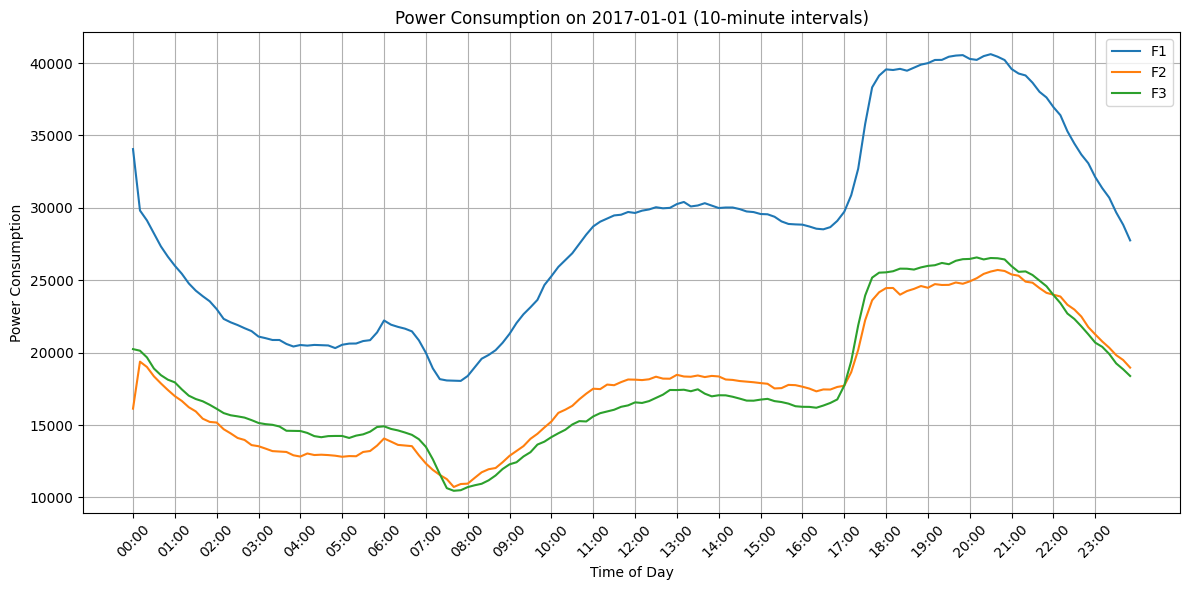

In [10]:


def plot_power_daily(date_to_plot, df):

    # Ensure Datetime is parsed and set as index
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

    # Filter for the given day
    selected_date = pd.to_datetime(date_to_plot).date()
    df_day = df[df.index.date == selected_date]

    if df_day.empty:
        print(f"No data available for {date_to_plot}")
        return

    # Resample to ensure clean 10-minute intervals (safe even if already 10T)
    df_resampled = df_day[
        ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']
    ].resample('10T').mean()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled['F1_132KV_PowerConsumption'], label='F1')
    plt.plot(df_resampled.index, df_resampled['F2_132KV_PowerConsumption'], label='F2')
    plt.plot(df_resampled.index, df_resampled['F3_132KV_PowerConsumption'], label='F3')

    plt.title(f"Power Consumption on {date_to_plot} (10-minute intervals)")
    plt.xlabel("Time of Day")
    plt.ylabel("Power Consumption")

    # Format x-axis ticks to show HH:MM
    plt.xticks(
        ticks=df_resampled.index[::6],  # every hour (since data is 10-minute spaced)
        labels=[t.strftime("%H:%M") for t in df_resampled.index[::6]],
        rotation=45
    )

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_power_daily("2017-01-01", df)




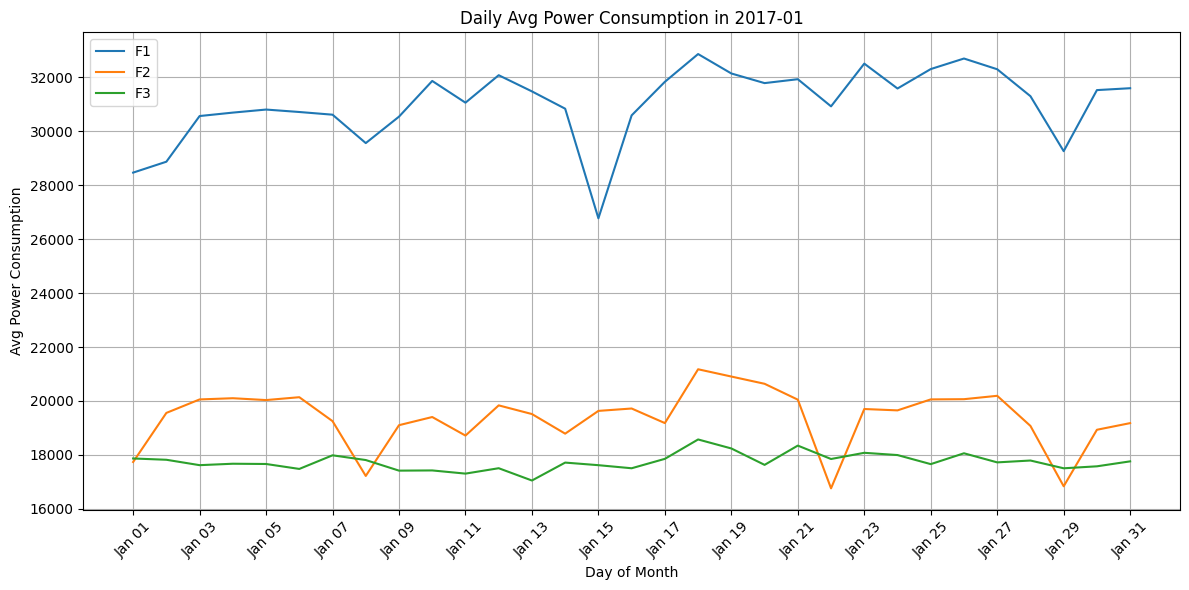

In [11]:


def plot_power_monthly(month_str, df):


    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

    df_month = df[df.index.strftime("%Y-%m") == month_str]
    if df_month.empty:
        print(f"No data for month {month_str}")
        return

    # Daily average
    df_daily = df_month[
        ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']
    ].resample('D').mean()

    plt.figure(figsize=(12, 6))
    for col in df_daily.columns:
        plt.plot(df_daily.index, df_daily[col], label=col.split('_')[0])

    plt.title(f"Daily Avg Power Consumption in {month_str}")
    plt.xlabel("Day of Month")
    plt.ylabel("Avg Power Consumption")

    plt.xticks(
        ticks=df_daily.index[::2],
        labels=[d.strftime("%b %d") for d in df_daily.index[::2]],
        rotation=45
    )
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_power_monthly("2017-01", df)


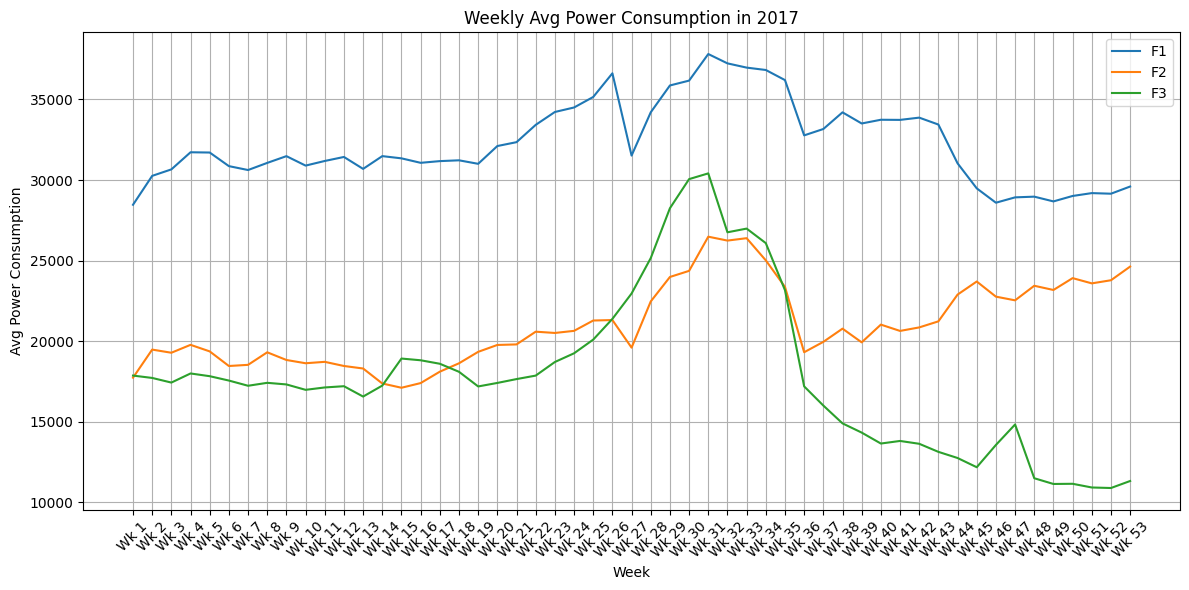

In [12]:
def plot_power_weekly(year_str, df):

    # Ensure datetime is parsed and set as index
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

    # Filter data for the given year
    df_year = df[df.index.strftime('%Y') == year_str]

    if df_year.empty:
        print(f"No data available for year {year_str}")
        return

    # Resample to weekly averages (1 week = 'W')
    df_weekly = df_year[
        ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']
    ].resample('W').mean()

    # Plotting
    plt.figure(figsize=(12, 6))
    for col in df_weekly.columns:
        plt.plot(df_weekly.index, df_weekly[col], label=col.split('_')[0])

    plt.title(f"Weekly Avg Power Consumption in {year_str}")
    plt.xlabel("Week")
    plt.ylabel("Avg Power Consumption")

    week_labels = [f"Wk {i+1}" for i in range(len(df_weekly))]
    plt.xticks(ticks=df_weekly.index,
           labels=week_labels,
           rotation=45)


    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_power_weekly("2017", df)


/tmp/ipython-input-13-2914137117.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ].resample('M').mean()


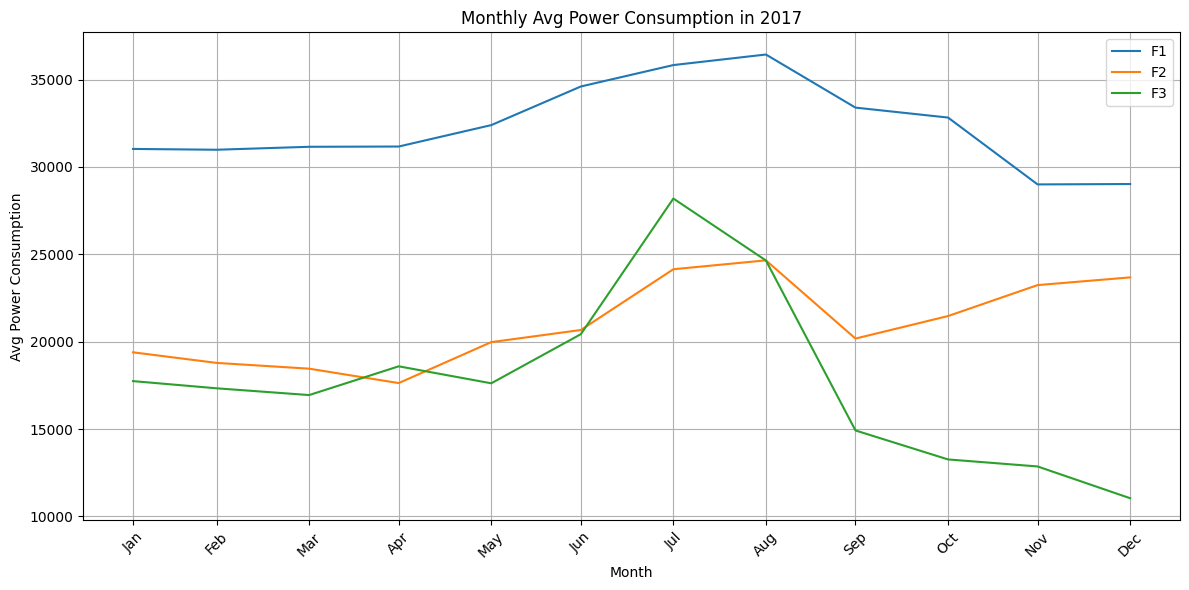

In [13]:
def plot_power_yearly(year_str, df):
    """
    Plots monthly average power consumption of F1, F2, F3 for a given year.
    X-axis: Month names (Jan, Feb, ..., Dec)

    Parameters:
    - year_str: e.g., '2017'
    - df: DataFrame with 'Datetime' column and power columns
    """

    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df.set_index('Datetime', inplace=True)

    df_year = df[df.index.strftime("%Y") == year_str]
    if df_year.empty:
        print(f"No data for year {year_str}")
        return

    df_monthly = df_year[
        ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']
    ].resample('M').mean()

    plt.figure(figsize=(12, 6))
    for col in df_monthly.columns:
        plt.plot(df_monthly.index, df_monthly[col], label=col.split('_')[0])

    plt.title(f"Monthly Avg Power Consumption in {year_str}")
    plt.xlabel("Month")
    plt.ylabel("Avg Power Consumption")

    plt.xticks(
        ticks=df_monthly.index,
        labels=[d.strftime("%b") for d in df_monthly.index],
        rotation=45
    )
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_power_yearly("2017", df)

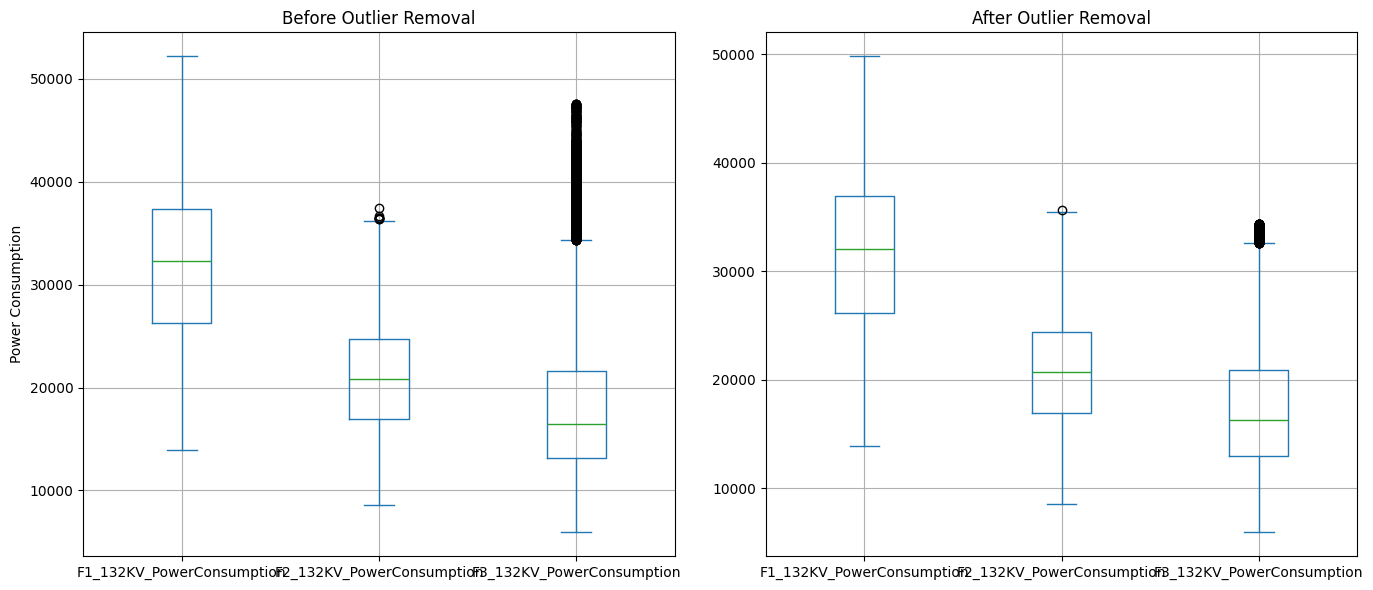

In [14]:


# If Datetime is in index, reset it to a column first
if isinstance(df.index, pd.DatetimeIndex):
    df = df.reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df[['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']].plot(kind='box', ax=plt.gca())
plt.title('Before Outlier Removal')
plt.ylabel('Power Consumption')
plt.grid(True)


def get_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Build a mask to keep rows within bounds for all feeders
mask = pd.Series(True, index=df.index)

for col in ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']:
    lower, upper = get_outlier_bounds(df[col])
    mask &= df[col].between(lower, upper)

# Apply mask
df_cleaned = df[mask].copy()


plt.subplot(1, 2, 2)
df_cleaned[['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']].plot(kind='box', ax=plt.gca())
plt.title('After Outlier Removal')
plt.grid(True)

plt.tight_layout()
plt.show()




In [15]:
df_cleaned.isnull().sum()# no null values

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
F1_132KV_PowerConsumption,0
F2_132KV_PowerConsumption,0
F3_132KV_PowerConsumption,0


In [16]:
df_cleaned.describe()

,Datetime,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
count,51225,51225.000000,51225.000000,51225.000000,51225.000000,51225.000000,51225.000000
mean,2017-07-01 09:32:43.045388032,18.618753,68.477939,1.898429,32017.899600,20804.394057,17350.690099
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070
25%,2017-03-30 22:20:00,14.330000,58.590000,0.077000,26174.867260,16892.871690,13012.048190
50%,2017-06-27 20:40:00,18.570000,69.990000,0.085000,32062.784810,20673.417720,16301.668340
75%,2017-10-03 01:30:00,22.550000,81.500000,4.915000,36881.860470,24350.151980,20849.153610
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,49807.058820,35631.818180,34361.171550
std,NaN,5.731200,15.381450,2.333940,6860.211999,5005.108566,5856.248887


In [17]:

holidays = pd.read_excel("/content/drive/MyDrive/holidays_jharkand.xlsx")
holidays['Date'] = pd.to_datetime(holidays['Date'], errors='coerce')
holidays = holidays.dropna(subset=['Date'])
holidays['is_holiday'] = 1

df_cleaned.index = pd.to_datetime(df_cleaned.index)
df_cleaned['date_only'] = df_cleaned.index.normalize()


df_merged = df_cleaned.merge(holidays[['Date', 'is_holiday']],
                              left_on='date_only', right_on='Date', how='left')

df_merged['is_holiday'] = df_merged['is_holiday'].fillna(0).astype(int)


for col in ['date_only', 'Date']:
    if col in df_merged.columns:
        df_merged.drop(columns=col, inplace=True)


df_merged.index.name = 'Datetime'


print(df_merged.head())


                    Datetime  Temperature  Humidity  WindSpeed  \
Datetime                                                         
0        2017-01-01 00:00:00        6.559      73.8      0.083   
1        2017-01-01 00:10:00        6.414      74.5      0.083   
2        2017-01-01 00:20:00        6.313      74.5      0.080   
3        2017-01-01 00:30:00        6.121      75.0      0.083   
4        2017-01-01 00:40:00        5.921      75.7      0.081   

          F1_132KV_PowerConsumption  F2_132KV_PowerConsumption  \
Datetime                                                         
0                       34055.69620                16128.87538   
1                       29814.68354                19375.07599   
2                       29128.10127                19006.68693   
3                       28228.86076                18361.09422   
4                       27335.69620                17872.34043   

          F3_132KV_PowerConsumption  is_holiday  
Datetime                

In [18]:
# Make sure 'Datetime' is a column (if not already)
if 'Datetime' not in df_merged.columns:
    df_merged.reset_index(inplace=True)

# Convert it to proper datetime if needed
df_merged['Datetime'] = pd.to_datetime(df_merged['Datetime'])

# Set it as the index
df_merged.set_index('Datetime', inplace=True)

# Confirm fix
print(df_merged.head())
print("✅ Index type:", df_merged.index.__class__)


                     Temperature  Humidity  WindSpeed  \
Datetime                                                
2017-01-01 00:00:00        6.559      73.8      0.083   
2017-01-01 00:10:00        6.414      74.5      0.083   
2017-01-01 00:20:00        6.313      74.5      0.080   
2017-01-01 00:30:00        6.121      75.0      0.083   
2017-01-01 00:40:00        5.921      75.7      0.081   

                     F1_132KV_PowerConsumption  F2_132KV_PowerConsumption  \
Datetime                                                                    
2017-01-01 00:00:00                34055.69620                16128.87538   
2017-01-01 00:10:00                29814.68354                19375.07599   
2017-01-01 00:20:00                29128.10127                19006.68693   
2017-01-01 00:30:00                28228.86076                18361.09422   
2017-01-01 00:40:00                27335.69620                17872.34043   

                     F3_132KV_PowerConsumption  is_holiday  

In [19]:
# Drop unnecessary column
if 'Date_y' in df_merged.columns:
    df_merged.drop(columns='Date_y', inplace=True)

# Rename date_only to Date if present
if 'date_only' in df_merged.columns:
    df_merged.rename(columns={'date_only': 'Date'}, inplace=True)

# Extract time-based features
df_merged['hour'] = df_merged.index.hour
df_merged['dayofweek'] = df_merged.index.dayofweek
df_merged['month'] = df_merged.index.month
df_merged['is_weekend'] = df_merged['dayofweek'].isin([5, 6]).astype(int)



print(df_merged.head())


                     Temperature  Humidity  WindSpeed  \
Datetime                                                
2017-01-01 00:00:00        6.559      73.8      0.083   
2017-01-01 00:10:00        6.414      74.5      0.083   
2017-01-01 00:20:00        6.313      74.5      0.080   
2017-01-01 00:30:00        6.121      75.0      0.083   
2017-01-01 00:40:00        5.921      75.7      0.081   

                     F1_132KV_PowerConsumption  F2_132KV_PowerConsumption  \
Datetime                                                                    
2017-01-01 00:00:00                34055.69620                16128.87538   
2017-01-01 00:10:00                29814.68354                19375.07599   
2017-01-01 00:20:00                29128.10127                19006.68693   
2017-01-01 00:30:00                28228.86076                18361.09422   
2017-01-01 00:40:00                27335.69620                17872.34043   

                     F3_132KV_PowerConsumption  is_holiday  

In [35]:
power_columns = ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']


In [36]:
from sklearn.model_selection import train_test_split

# Features = everything except current F1, F2, F3
X = df_merged.drop(columns=power_columns)
Y = df_merged[power_columns]

# Time-based split
split_idx = -144*7
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
Y_train, Y_test = Y.iloc[:split_idx], Y.iloc[split_idx:]


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # ensure this is imported

models = {}
predictions = {}
metrics = {}

for target in power_columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, Y_train[target])
    y_pred = model.predict(X_test)

    models[target] = model
    predictions[target] = y_pred
    metrics[target] = {
        "r2_score": r2_score(Y_test[target], y_pred),
        "rmse": np.sqrt(mean_squared_error(Y_test[target], y_pred))
    }


In [38]:
for target in power_columns:
    print(f" {target}")
    print("R2 Score:", metrics[target]["r2_score"])
    print("RMSE:", metrics[target]["rmse"])
    print("-----------")


 F1_132KV_PowerConsumption
R2 Score: 0.9565735617735256
RMSE: 1319.7740590202282
-----------
 F2_132KV_PowerConsumption
R2 Score: 0.9535880371052657
RMSE: 1222.711307631409
-----------
 F3_132KV_PowerConsumption
R2 Score: 0.9384169841476038
RMSE: 713.7482648024007
-----------


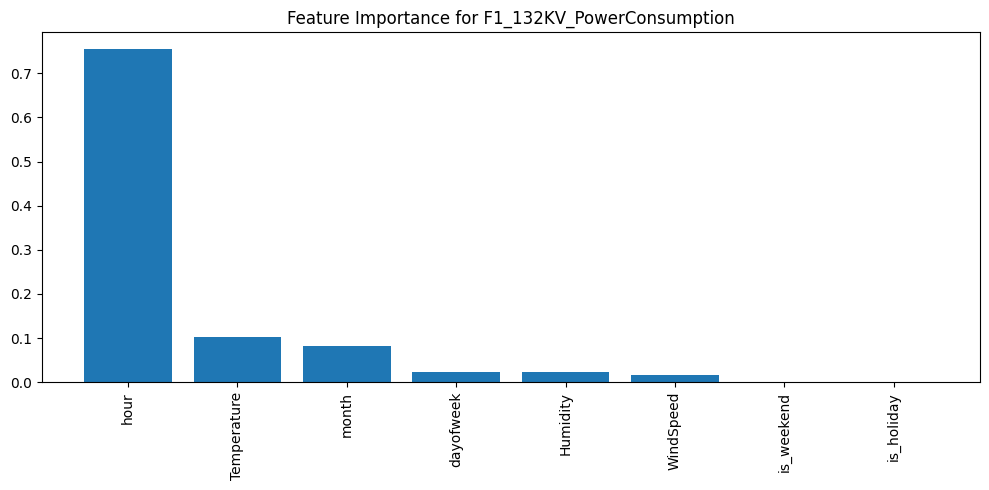

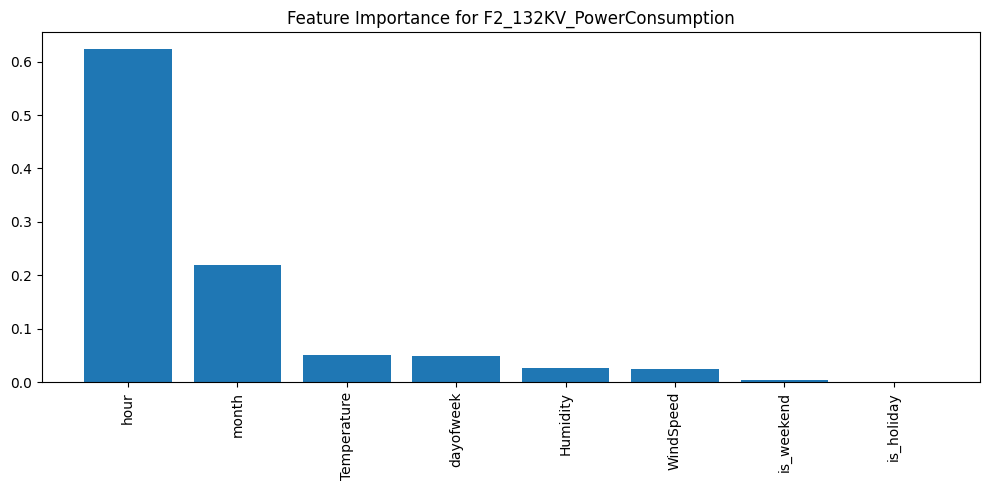

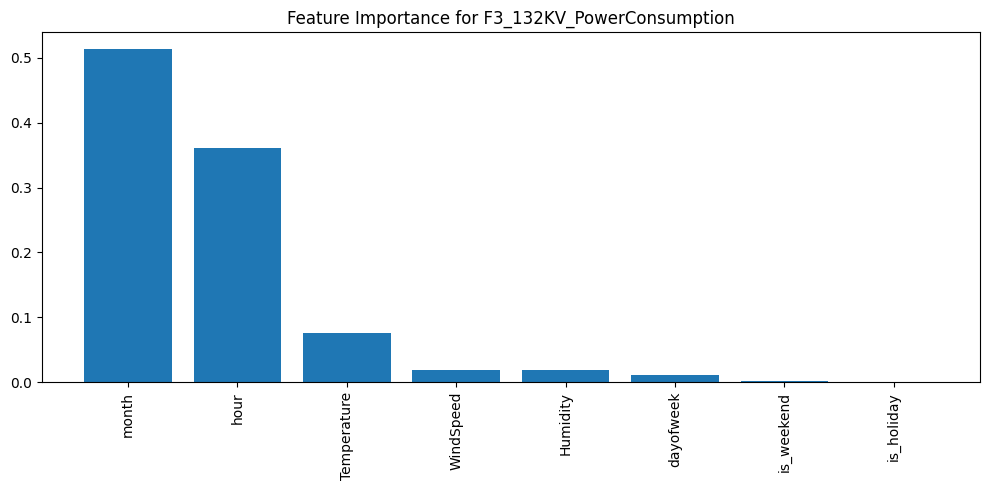

In [39]:
import matplotlib.pyplot as plt
import numpy as np

for target in power_columns:
    importances = models[target].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title(f"Feature Importance for {target}")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()


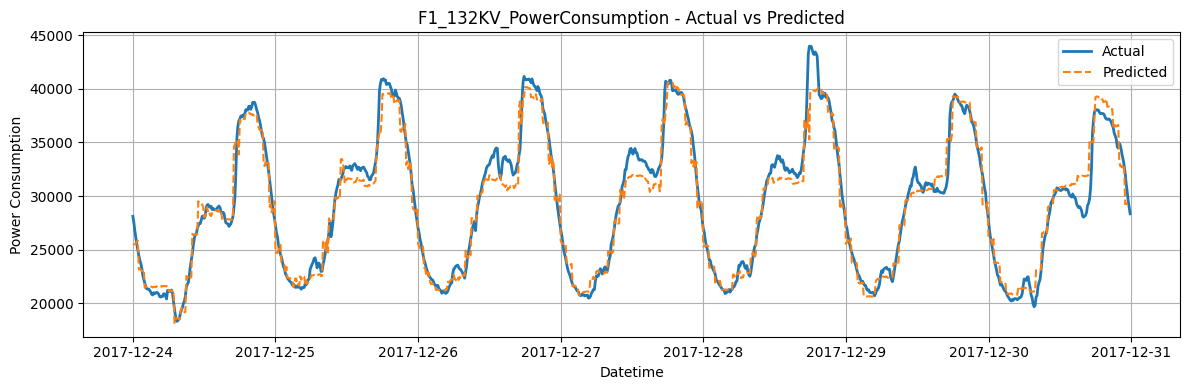

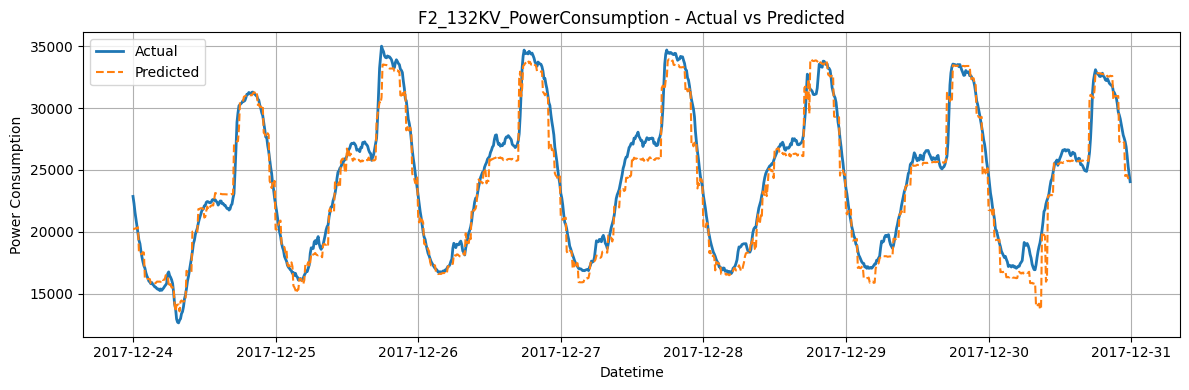

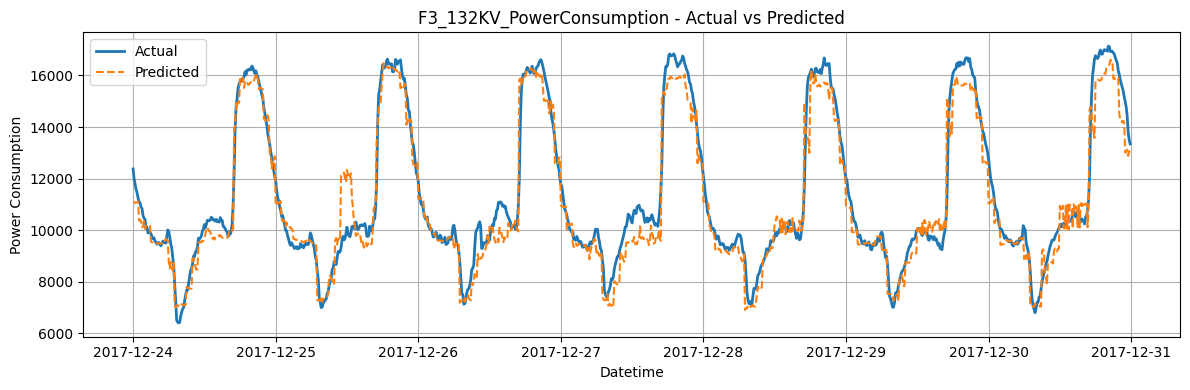

In [40]:
for target in power_columns:
    plt.figure(figsize=(12, 4))
    plt.plot(Y_test.index, Y_test[target], label='Actual', linewidth=2)
    plt.plot(Y_test.index, predictions[target], label='Predicted', linestyle='--')
    plt.title(f"{target} - Actual vs Predicted")
    plt.xlabel("Datetime")
    plt.ylabel("Power Consumption")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [41]:
import joblib

for target in power_columns:
    joblib.dump(models[target], f'{target}_rf_model.pkl')


In [42]:
import pandas as pd

# Make predictions on X_test
future_preds = pd.DataFrame(index=X_test.index)

for target in power_columns:
    model = models[target]  # now loaded from .pkl files
    future_preds[target] = model.predict(X_test)

# Add contextual features
future_preds["Temperature"] = X_test["Temperature"]
future_preds["Humidity"] = X_test["Humidity"]
future_preds["WindSpeed"] = X_test["WindSpeed"]
future_preds["CloudCover"] = X_test.get("CloudCover", pd.NA)
future_preds["is_holiday"] = X_test["is_holiday"]
future_preds["hour"] = X_test["hour"]
future_preds["dayofweek"] = X_test["dayofweek"]

# Save to CSV
future_preds.reset_index(inplace=True)
future_preds.to_csv("forecast_next_7_days.csv", index=False)

print("✅ Predictions for next 7 days saved to: forecast_next_7_days.csv")


✅ Predictions for next 7 days saved to: forecast_next_7_days.csv


In [43]:
# backend/app.py
from flask import Flask, jsonify, request
import pandas as pd
import joblib
from datetime import datetime, timedelta

app = Flask(__name__)

# Load model and feature pipeline
models = {
    "F1": joblib.load("/content/F1_132KV_PowerConsumption_rf_model.pkl"),
    "F2": joblib.load("/content/F2_132KV_PowerConsumption_rf_model.pkl"),
    "F3": joblib.load("/content/F3_132KV_PowerConsumption_rf_model.pkl")
}
data = pd.read_csv("data/forecast_input.csv", parse_dates=["Datetime"])
weather = pd.read_csv("data/weather_forecast.csv")  # 96 future blocks
holidays = pd.read_csv("/content/drive/MyDrive/holidays_jharkand.xlsx")

@app.route("/forecast", methods=["GET"])
def forecast():
    output = {}
    for feeder in ["F1", "F2", "F3"]:
        model = models[feeder]
        X = data.copy()  # Assumes features are pre-extracted
        y_pred = model.predict(X)
        output[feeder] = y_pred.tolist()
    return jsonify(output)

@app.route("/forecast-meta", methods=["GET"])
def forecast_meta():
    return jsonify({
        "weather": weather.to_dict(orient="records"),
        "holidays": holidays.to_dict(orient="records")
    })

if __name__ == "__main__":
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'data/forecast_input.csv'